##                                               chandan shah
(080BCT023)

## NR system

Converged in 4 iterations.
Solution: [1.25865202 0.67444711]


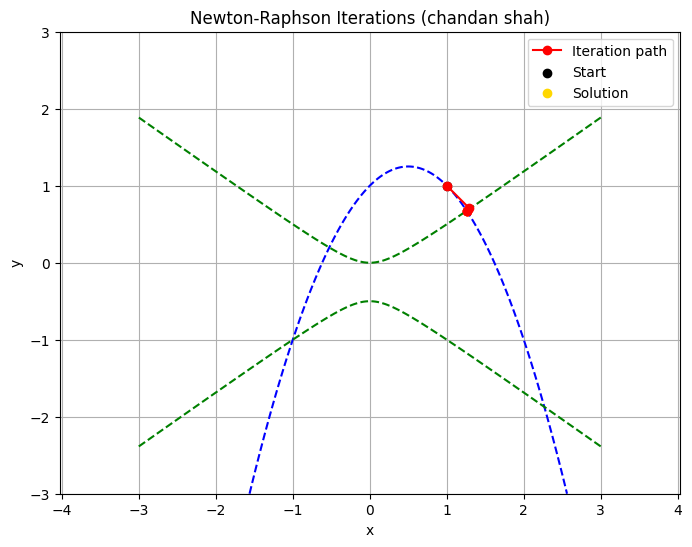

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def f(x_vec):
    x, y = x_vec
    return np.array([ x**2 + y - 1 - x,
                     x**2 - 2*y**2 - y])


def jacobian(x_vec):
    x, y = x_vec
    return np.array([[2*x-1, 1],
                     [2*x, -4*y-1]])

def newton_raphson(f, jacobian, x0, tol=1e-6, max_iter=50):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    for i in range(max_iter):
        F = f(x)
        J = jacobian(x)
        delta = np.linalg.solve(J, F)
        x_new = x - delta
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=2) < tol:
            print(f'Converged in {i+1} iterations.')
            return x_new, path
        x = x_new
    raise Exception('Newton-Raphson did not converge')


x0 = [1.0, 1.0]
solution, path = newton_raphson(f, jacobian, x0)

print('Solution:', solution)


path = np.array(path)
x_path, y_path = path[:, 0], path[:, 1]


X, Y = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
F1 = X**2 + Y - 1 - X
F2 = X**2 - 2*Y**2 - Y


plt.figure(figsize=(8, 6))
plt.contour(X, Y, F1, levels=[0], colors='blue', linestyles='dashed', linewidths=1.5)
plt.contour(X, Y, F2, levels=[0], colors='green', linestyles='dashed', linewidths=1.5)


plt.plot(x_path, y_path, marker='o', color='red', label='Iteration path')
plt.scatter([x_path[0]], [y_path[0]], color='black', label='Start')
plt.scatter([x_path[-1]], [y_path[-1]], color='gold', label='Solution')

plt.title('Newton-Raphson Iterations (chandan shah)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## polynomial fitting 


using vandarmonde matrix  function of numpy

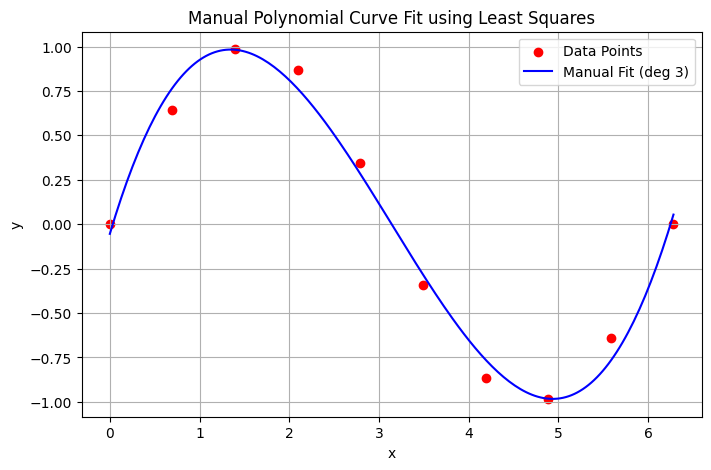


Fitted Polynomial Equation:
y = -0.0542 + 1.6945*x + -0.8008*x^2 + 0.0850*x^3


In [45]:
import numpy as np
import matplotlib.pyplot as plt
# x = np.array([0, 30, 45, 90])  
# y = np.array([0, 0.5,1/np.sqrt(2), 1])  
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x_data)


degree = 3



A = np.vander(x, degree + 1, increasing=True)

# Solve normal equations
ATA = A.T @ A
ATy = A.T @ y
coeffs = np.linalg.solve(ATA, ATy)

# Evaluate using np.polyval (requires highest degree first)
coeffs_polyval = coeffs[::-1]  # reverse for np.polyval
x_fit = np.linspace(min(x), max(x), 200)
y_fit = np.polyval(coeffs_polyval, x_fit)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_fit, y_fit, color='blue', label=f'Manual Fit (deg {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Manual Polynomial Curve Fit using Least Squares')
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial equation
print("\nFitted Polynomial Equation:")
terms = []
for i, c in enumerate(coeffs):
    power = f"x^{i}" if i > 1 else ("x" if i == 1 else "")
    terms.append(f"{c:.4f}{('*' if power else '')}{power}")
equation = " + ".join(terms)
print("y =", equation)

Coefficients c0, c1, c2, c3:
 [-0.05419021  1.69446539 -0.8008117   0.08496876]


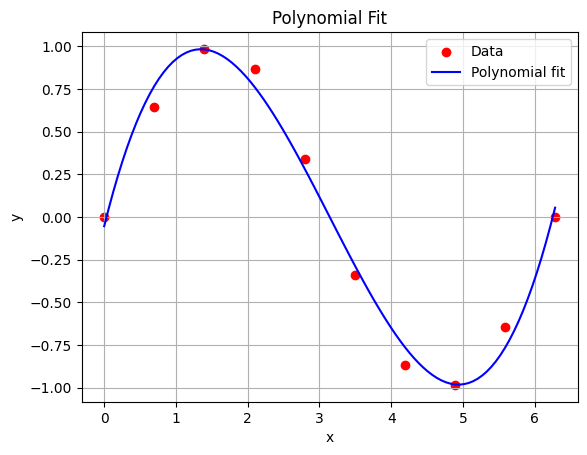

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(0, 2*np.pi, 10)
y_data = np.sin(x_data)
m = 3

n = len(x_data)


A = np.zeros((m+1, m+1))
B = np.zeros(m+1)


for i in range(m+1):
    for j in range(m+1):
        A[i, j] = np.sum(x_data**(i + j))  # sum x^(i+j)
    B[i] = np.sum((x_data**i) * y_data)     # sum x^i * y


c = np.linalg.solve(A, B)

print("Coefficients c0, c1, c2, c3:\n", c)

xx = np.linspace(min(x_data), max(x_data), 100)
yy = np.polyval(c[::-1], xx)  
plt.scatter(x_data, y_data, color='red', label='Data')
plt.plot(xx, yy, color='blue', label='Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Polynomial Fit')
plt.show()